## Load Packages

In [65]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Read Data

In [479]:
s_and_p_500 = pd.read_csv('/Users/cgillies/Documents/workspace-sts-3.9.4.RELEASE/Examples/sandp500.tsv',sep='\t')
s_and_p_500['Date'] = pd.to_datetime(s_and_p_500['Date'])
s_and_p_500['Price'] = np.float64(list(map( lambda x: x.replace(',',''), list(s_and_p_500['Price'])) ) )
s_and_p_500 = s_and_p_500.sort_values('Date')

## Keep only 1928 <= year < 2017

In [480]:
s_and_p_500 = s_and_p_500.query('Date >= "1928-01-01" and Date <= "2017-01-01"')
print(s_and_p_500.head())

         Date  Price
91 1928-01-01  17.53
90 1929-01-01  24.86
89 1930-01-01  21.71
88 1931-01-01  15.98
87 1932-01-01   8.30


In [481]:
return_rates = []
diffs = []
dates = []
for i in range(1,s_and_p_500.shape[0]):
    diff = s_and_p_500.iloc[i]['Price'] - s_and_p_500.iloc[i - 1]['Price']
    change = diff/s_and_p_500.iloc[i - 1]['Price']
    diffs.append(diff)
    return_rates.append(change)
    dates.append(s_and_p_500.iloc[i]['Date'])

         Date    Price    Diff    Return
91 1928-01-01    17.53     NaN       NaN
90 1929-01-01    24.86    7.33  0.418140
89 1930-01-01    21.71   -3.15 -0.126710
88 1931-01-01    15.98   -5.73 -0.263934
87 1932-01-01     8.30   -7.68 -0.480601
86 1933-01-01     7.09   -1.21 -0.145783
85 1934-01-01    10.54    3.45  0.486601
84 1935-01-01     9.26   -1.28 -0.121442
83 1936-01-01    13.76    4.50  0.485961
82 1937-01-01    17.59    3.83  0.278343
81 1938-01-01    11.31   -6.28 -0.357021
80 1939-01-01    12.50    1.19  0.105217
79 1940-01-01    12.30   -0.20 -0.016000
78 1941-01-01    10.55   -1.75 -0.142276
77 1942-01-01     8.93   -1.62 -0.153555
76 1943-01-01    10.09    1.16  0.129899
75 1944-01-01    11.85    1.76  0.174430
74 1945-01-01    13.49    1.64  0.138397
73 1946-01-01    18.02    4.53  0.335804
72 1947-01-01    15.21   -2.81 -0.155938
71 1948-01-01    14.83   -0.38 -0.024984
70 1949-01-01    15.36    0.53  0.035738
69 1950-01-01    16.88    1.52  0.098958
68 1951-01-01   

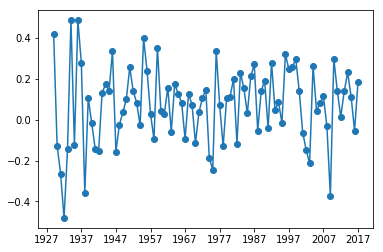

In [563]:
return_rates_assign = [np.nan]
return_rates_assign.extend(return_rates)
diffs_assign = [np.nan]
diffs_assign.extend(diffs)
s_and_p_500['Diff'] = diffs_assign
s_and_p_500['Return'] = return_rates_assign
print(s_and_p_500)
plt.plot(dates,return_rates,'-o')

s_and_p_500.to_excel('/Users/cgillies/Documents/workspace-sts-3.9.4.RELEASE/Examples/sandp500.xlsx')

Mean=0.07396338633671162, Median=0.09895833333333331, Sd=0.1871274326384005


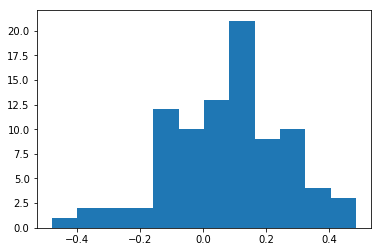

In [483]:
hist = plt.hist(return_rates,bins=12)
mean = np.mean(return_rates)
median = np.median(return_rates)
sd = np.std(return_rates)
print(f"Mean={mean}, Median={median}, Sd={sd}")

In [131]:
print(s_and_p_500.iloc[-1])
print(s_and_p_500.iloc[-2])
print(s_and_p_500.iloc[1])
print(s_and_p_500.iloc[0])

Date      2018-01-01 00:00:00
Price                  2789.8
Diff                   514.68
Return               0.226221
Name: 1, dtype: object
Date      2017-01-01 00:00:00
Price                 2275.12
Diff                   356.52
Return               0.185823
Name: 2, dtype: object
Date      1931-01-01 00:00:00
Price                   15.98
Diff                    -5.73
Return              -0.263934
Name: 88, dtype: object
Date      1930-01-01 00:00:00
Price                   21.71
Diff                      NaN
Return                    NaN
Name: 89, dtype: object


$$FV = P(1 + r)^y$$

$$ \exp\left( \frac{\ln \frac{FV}{P}}{y} \right ) - 1 = r $$

$$ 2418.45 = 21.21(1+r)^{67} $$

$$ \exp\left( \frac{\ln \frac{2418.45}{21.21}}{67} \right ) - 1 = r $$

$$ 0.07325134020642143 = r $$

In [132]:
def compute_fv(p,r,y):
    return p * ( 1 + r ) ** y

In [366]:
def compute_rate(p,fv,y):
    return np.exp( np.log(fv/p) / y ) -  1 



r = compute_rate(21.21,2418.45,67)
print(r)



0.07325134020642143


In [109]:
compute_fv(21.21,r,67)

2418.4500000000085

In [121]:
compute_rate(15.98,2028.18,2015-1931)

0.05935621901850241

In [134]:
compute_rate(15.98,2789.8,2018-1930)

0.06041834085194697

In [183]:
def sample(n,mean,sd):
    return sd * np.random.randn(n) + mean

In [580]:
years = 21
nsim = 1000
start_amount = 200491 + 200000
#start_amount = 263740 + 200000

amounts = np.zeros((nsim,years + 1))
#withdraw_rate = 0.06
#withdraw_amount = start_amount * withdraw_rate
withdraw_amount = 30000
inflation_rate = 0.02
print(withdraw_amount)
rates_all = []
for i in range(0,nsim):
    rates = sample(years,0.1,0.19)
    rates_all.extend(rates)
    #print(np.mean(rates))
    amount = start_amount
    amounts[i,0] = amount
    new_withdraw_amount = withdraw_amount
    for j in range(1,years + 1):
        rate = rates[j - 1]
        amount = amount * (1 + rate)
        if rate < 0:
            amount = amount - new_withdraw_amount
        else:
            amount = amount - new_withdraw_amount * 2/3
            
        new_withdraw_amount = new_withdraw_amount * (1 + inflation_rate)
        amounts[i,j] = amount

amounts_avg = np.median(amounts,axis=0)
print(new_withdraw_amount)

30000
45469.99031693766


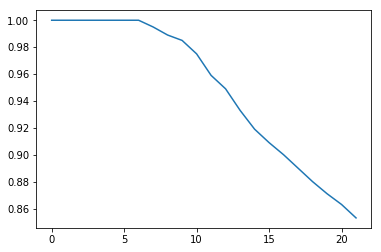

In [577]:
frac = np.sum(amounts >= 25000,axis=0) / nsim
plt.plot(frac)

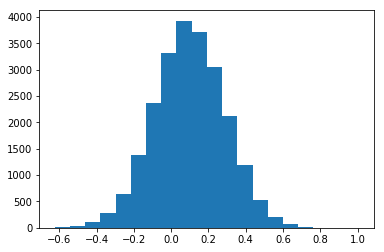

In [532]:
hist_plt = plt.hist(rates_all,bins=20)

(1000, 22)
(22,)


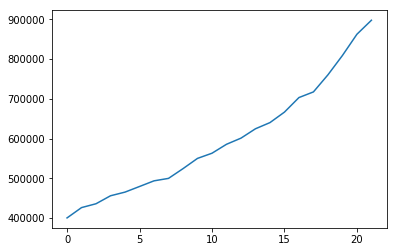

In [578]:
print(amounts.shape)
print(amounts[0,:].shape)
plt.plot(amounts_avg)

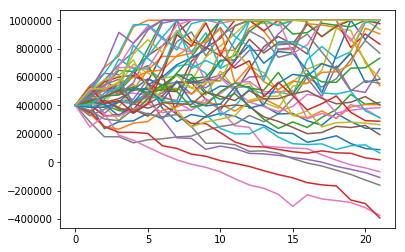

In [579]:
amounts_filter = np.clip(amounts,a_min=-500000,a_max=1000000)

for i in range(0,50):
    plt.plot(amounts_filter[i,:])

$$ \sum_{k=0}^{n-1} ar^k = a \left ( \frac{1-r^{n}}{1-r} \right )$$

In [575]:
def sum_of_series(a,r,n):
    return a * (1 - (r ** n) ) / ( 1 - r)

rate_of_return = 1.1
print(sum_of_series(3600 * 12,rate_of_return,4))

a = 0
save_amount = 3600 * 12
for i in range(0,4):
    #print(a)
    a = (a * rate_of_return) + save_amount

print(a)



200491.19999999998
200491.2
